Опять попробовал через  tensorflow  сделать. 

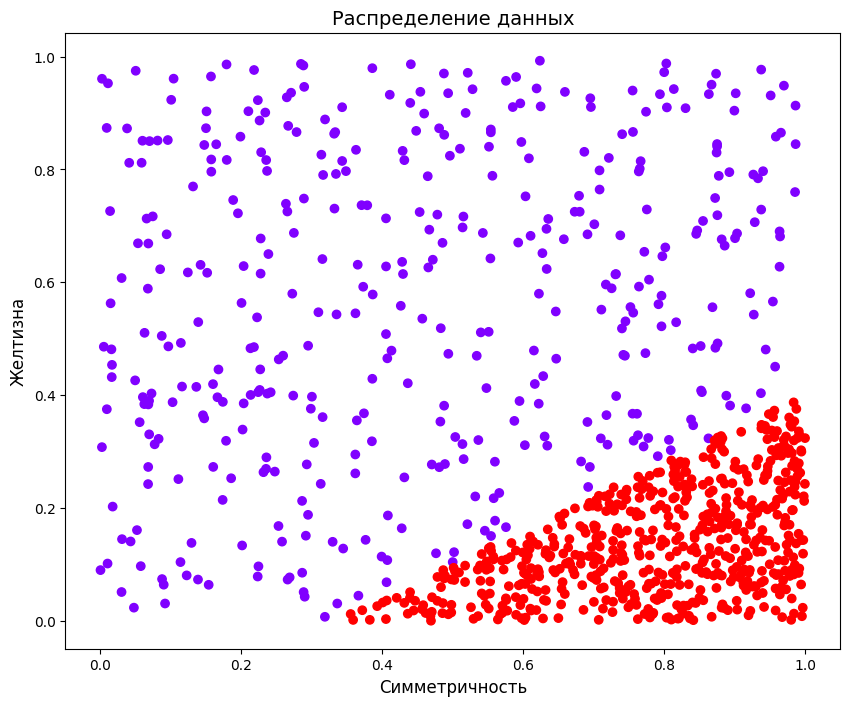

Epoch 0, Loss: 0.0956
Epoch 1000, Loss: 0.0550
Epoch 2000, Loss: 0.0440
Epoch 3000, Loss: 0.0381
Epoch 4000, Loss: 0.0344


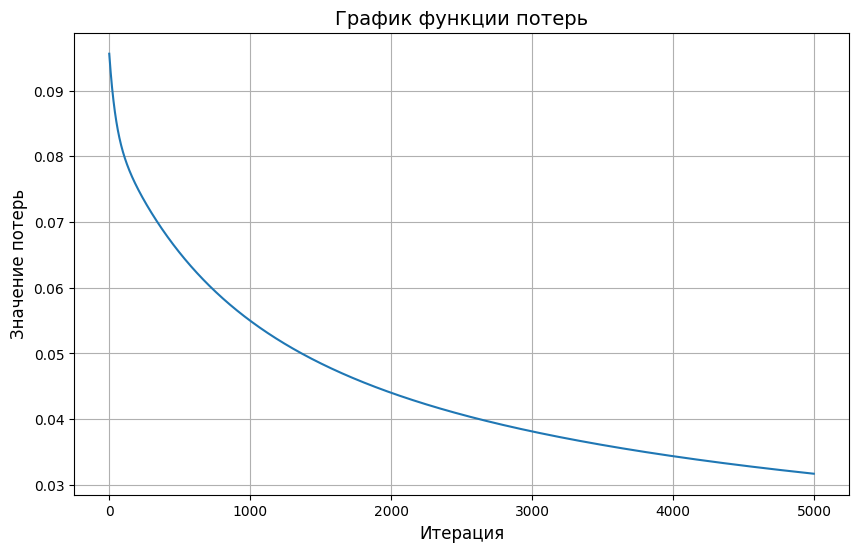


Матрица ошибок:
[[351  61]
 [  0 588]]

Детальный отчет:
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92       412
         1.0       0.91      1.00      0.95       588

    accuracy                           0.94      1000
   macro avg       0.95      0.93      0.94      1000
weighted avg       0.94      0.94      0.94      1000



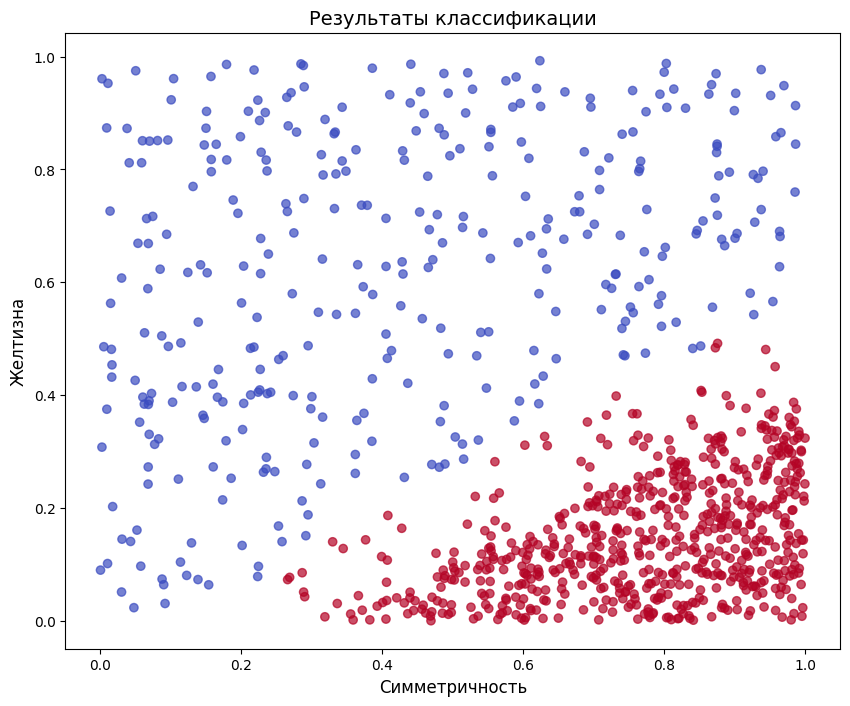


Метрики классификации:
Accuracy: 0.9390
Precision: 0.9060
Recall: 1.0000
F1-score: 0.9507
AUC-ROC: 0.9999


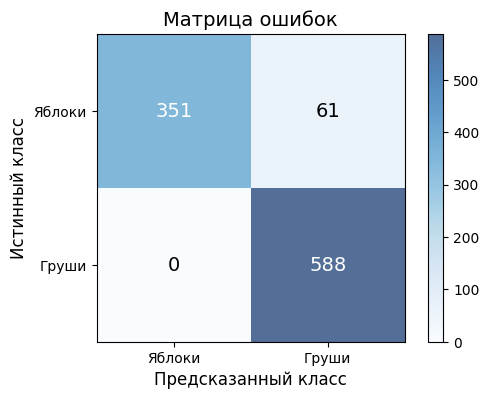

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Определение функций активации и потерь
def sigmoid(x):
    return tf.math.sigmoid(x)

def loss(y_pred, y):
    return 0.5 * tf.reduce_mean((y_pred - y) ** 2)

# Класс нейрона
class Neuron(tf.Module):
    def __init__(self, input_dim, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.random.normal([input_dim, 1]), name='weights')
        self.b = tf.Variable(tf.zeros([1]), name='bias')
        
    def __call__(self, X):
        z = tf.matmul(X, self.w) + self.b
        return sigmoid(z)
    
    def fit(self, X, y, num_epochs=5000, learning_rate=0.1):
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        y = tf.convert_to_tensor(y, dtype=tf.float32)
        
        optimizer = tf.optimizers.SGD(learning_rate)
        loss_history = []
        
        for epoch in range(num_epochs):
            with tf.GradientTape() as tape:
                y_pred = self(X)
                current_loss = loss(y_pred, y)
                
            grads = tape.gradient(current_loss, [self.w, self.b])
            optimizer.apply_gradients(zip(grads, [self.w, self.b]))
            
            loss_history.append(current_loss.numpy())
            
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {current_loss.numpy():.4f}")
                
        return loss_history

# Загрузка и подготовка данных
data = pd.read_csv("/home/admin/Документы/!PLEHA/LAB /II_LABS/LABS_II/LABII/apple_pear.csv")
X = data.iloc[:, :2].values.astype(np.float32)
y = data['target'].values.reshape(-1, 1).astype(np.float32)

# Визуализация исходных данных
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Распределение данных', fontsize=14)
plt.xlabel('Симметричность', fontsize=12)
plt.ylabel('Желтизна', fontsize=12)
plt.show()

# Обучение модели
model = Neuron(input_dim=2)
loss_history = model.fit(X, y, num_epochs=5000, learning_rate=0.1)

# Визуализация функции потерь
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('График функции потерь', fontsize=14)
plt.xlabel('Итерация', fontsize=12)
plt.ylabel('Значение потерь', fontsize=12)
plt.grid(True)
plt.show()

# Получение предсказаний
y_proba = model(X).numpy().ravel()
y_pred = (y_proba > 0.5).astype(int)
y_true = data['target'].values


# Матрица ошибок
cm = confusion_matrix(y_true, y_pred)
print("\nМатрица ошибок:")
print(cm)

# Отчет классификации
print("\nДетальный отчет:")
print(classification_report(y_true, y_pred))
print("="*60)



plt.show()

# Визуализация предсказаний
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=(y_proba > 0.5).astype(int), cmap='coolwarm', alpha=0.7)
plt.title('Результаты классификации', fontsize=14)
plt.xlabel('Симметричность', fontsize=12)
plt.ylabel('Желтизна', fontsize=12)
plt.show()

# матрицы ошибок
plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap='Blues', alpha=0.7)
plt.title('Матрица ошибок', fontsize=14)
plt.colorbar()
plt.xticks([0, 1], ['Яблоки', 'Груши'], fontsize=10)
plt.yticks([0, 1], ['Яблоки', 'Груши'], fontsize=10)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='white' if cm[i,j] > cm.max()/2 else 'black',
                 fontsize=14)

# Вычисление метрик
print("\n" + "="*60)
print("Метрики классификации:")
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision: {precision_score(y_true, y_pred):.4f}")
print(f"Recall: {recall_score(y_true, y_pred):.4f}")
print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_true, y_proba):.4f}")


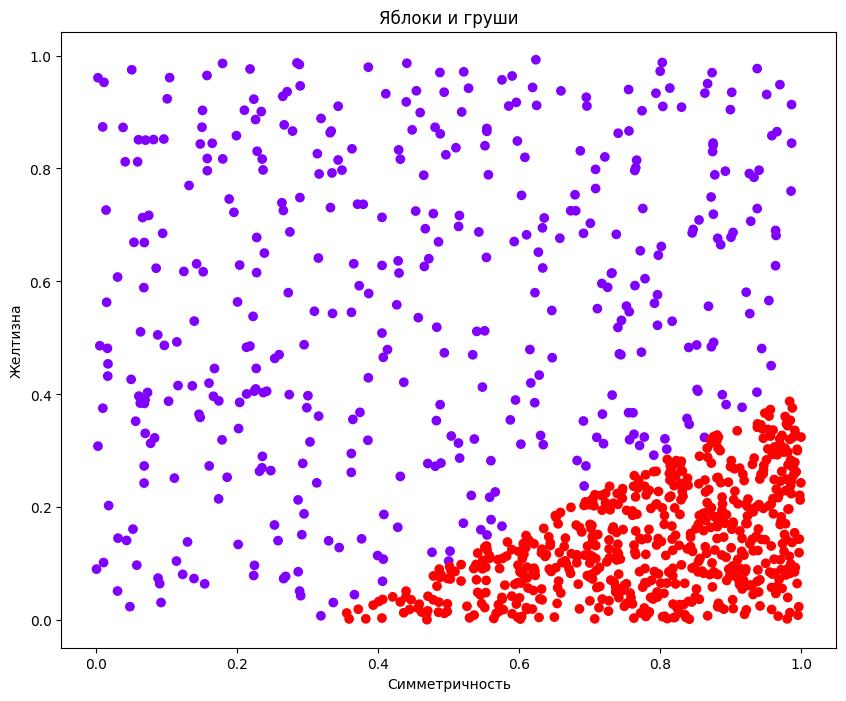

Epoch 0, Loss: 1.3691
Epoch 1000, Loss: 0.2671
Epoch 2000, Loss: 0.1971
Epoch 3000, Loss: 0.1675
Epoch 4000, Loss: 0.1500


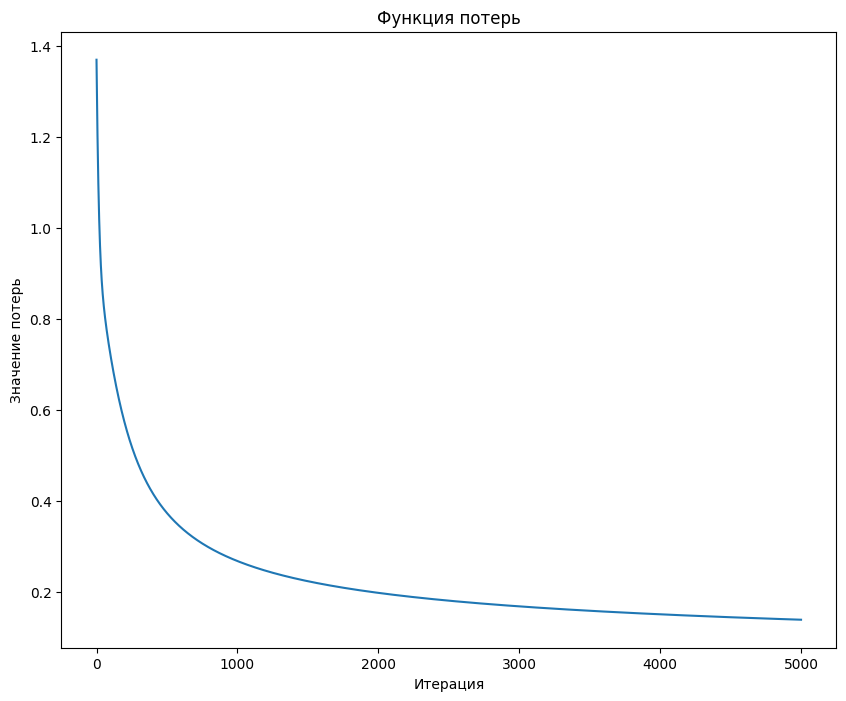

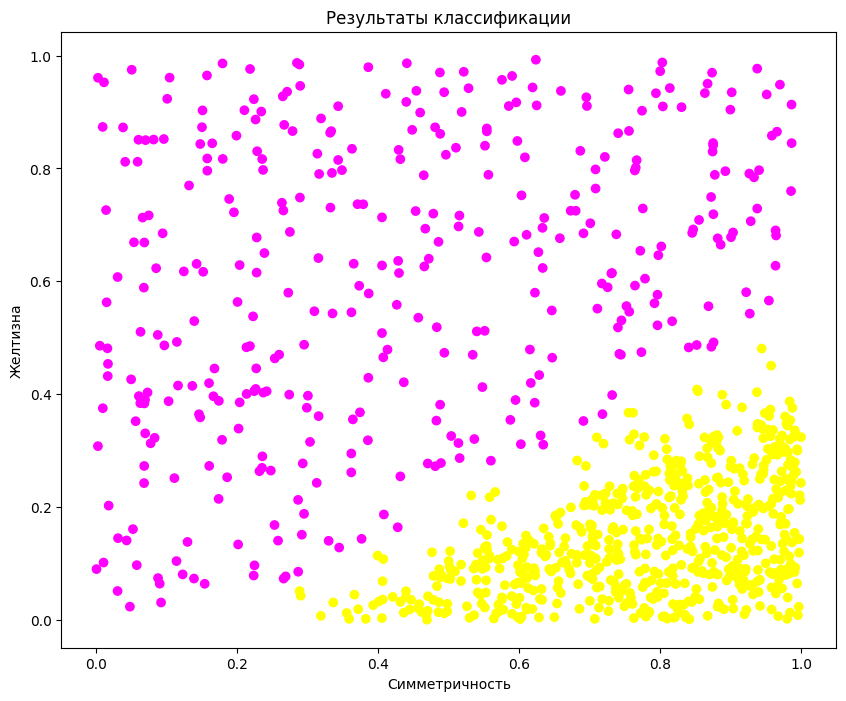

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Определение функций активации и потерь через TensorFlow
def sigmoid(x):
    return tf.math.sigmoid(x)

def loss(y_pred, y):
    return -tf.reduce_mean(y * tf.math.log(y_pred) + (1 - y) * tf.math.log(1 - y_pred))

class Neuron(tf.Module):
    def __init__(self, input_dim, **kwargs):
        super().__init__(**kwargs)
        # Инициализация параметров с помощью TensorFlow
        self.w = tf.Variable(tf.random.normal([input_dim, 1], dtype=tf.float32), name='weights')
        self.b = tf.Variable(tf.zeros([1], dtype=tf.float32), name='bias')
        
    def __call__(self, X):
        # Прямой проход с использованием тензорных операций
        z = tf.matmul(tf.cast(X, tf.float32), self.w) + self.b
        return sigmoid(z)
    
    def fit(self, X, y, num_epochs=5000, learning_rate=0.1):
        # Преобразование данных в тензоры
        X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
        y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)
        
        # Оптимизатор и история потерь
        optimizer = tf.optimizers.SGD(learning_rate)
        loss_history = []
        
        for epoch in range(num_epochs):
            with tf.GradientTape() as tape:
                y_pred = self(X_tensor)
                current_loss = loss(y_pred, y_tensor)
                
            # Автоматическое вычисление градиентов
            grads = tape.gradient(current_loss, [self.w, self.b])
            # Обновление параметров
            optimizer.apply_gradients(zip(grads, [self.w, self.b]))
            
            loss_history.append(current_loss.numpy())
            
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {current_loss.numpy():.4f}")
                
        return loss_history

# Загрузка и подготовка данных
data = pd.read_csv("/home/admin/Документы/!PLEHA/LAB /II_LABS/LABS_II/LABII/apple_pear.csv")
X = data.iloc[:, :2].values
y = data['target'].values.reshape(-1, 1)

# Визуализация данных
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши')
plt.xlabel('Симметричность')
plt.ylabel('Желтизна')
plt.show()

# Создание и обучение модели
model = Neuron(input_dim=2)
loss_history = model.fit(X, y, num_epochs=5000, learning_rate=0.1)

# Визуализация 
plt.figure(figsize=(10, 8))
plt.plot(loss_history)
plt.title('Функция потерь')
plt.xlabel('Итерация')
plt.ylabel('Значение потерь')
plt.show()

# Визуализация 
predictions = model(X).numpy()
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=(predictions > 0.5).ravel(), cmap='spring')
plt.title('Результаты классификации')
plt.xlabel('Симметричность')
plt.ylabel('Желтизна')
plt.show()


Метрики качества модели:
Точность (Accuracy): 0.9560
F1-мера: 0.9639
AUC-ROC: 0.9998

Матрица ошибок:
[[368  44]
 [  0 588]]

Полный отчет:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       412
         1.0       0.93      1.00      0.96       588

    accuracy                           0.96      1000
   macro avg       0.97      0.95      0.95      1000
weighted avg       0.96      0.96      0.96      1000




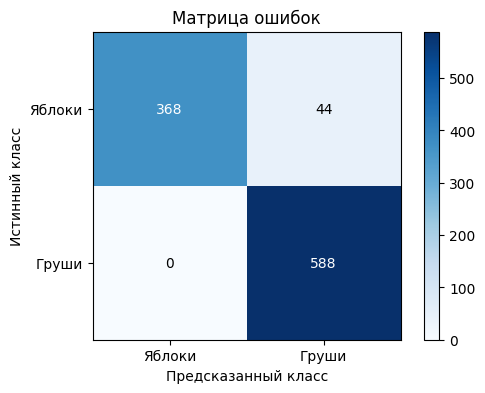

In [5]:


from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


y_pred_proba = model(X).numpy()
y_pred = (y_pred_proba > 0.5).astype(int)
y_true = data['target'].values

# Вычисляем метрики
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_proba)
cm = confusion_matrix(y_true, y_pred)

# Выводим метрики
print("\n" + "="*50)
print("Метрики качества модели:")
print(f"Точность (Accuracy): {accuracy:.4f}")
print(f"F1-мера: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("\nМатрица ошибок:")
print(cm)
print("\nПолный отчет:")
print(classification_report(y_true, y_pred))
print("="*50 + "\n")

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.xticks([0, 1], ['Яблоки', 'Груши'])
plt.yticks([0, 1], ['Яблоки', 'Груши'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), 
                 ha='center', 
                 va='center',
                 color='white' if cm[i,j] > cm.max()/2 else 'black')

plt.show();